In [1]:
#!/usr/bin/env python3
"""
This script loads the following:
-- data/<data_name>/<data_name>.json,
-- data/<data_name>/rf_results/selected_feats.txt,
-- <data_name>_raw_<use_rdkit>.csv,
-- and <data_name>_train_test_idxs.pickle
to split the data and train the GNN model on a 
data split. It outputs the R2 score and logs to 
-- output/<model_name>/
"""



'\nThis script loads the following:\n-- data/<data_name>/<data_name>.json,\n-- data/<data_name>/rf_results/selected_feats.txt,\n-- <data_name>_raw_<use_rdkit>.csv,\n-- and <data_name>_train_test_idxs.pickle\nto split the data and train the GNN model on a \ndata split. It outputs the R2 score and logs to \n-- output/<model_name>/\n'

In [1]:
%cd /afs/crc.nd.edu/user/m/msaebi/Public/chemistry/yield_rxn

/afs/crc.nd.edu/user/m/msaebi/Public/chemistry/yield_rxn


In [2]:
import matplotlib.pyplot as plt
from collections import defaultdict
from scripts import plot_utils as pu

import numpy as np
%matplotlib inline
import pickle
import os
import pandas as pd
import statistics

In [3]:
best_scores=defaultdict(lambda: defaultdict(lambda: defaultdict(float)))

In [24]:
batch_size=40;lr_decay= 0.5;lr_steps= 10000;learning_rate = 0.01
gc='gc';domain= 'rdkit';Abs='abs';
seed='1'
model_version = 'model_5.3.1-lw-';
#model_version = 'model_5.3.0-lw-';
model_dir= model_version.strip('-')+'/'
#model_name='su_'+model_version; layers= 2;epochs= 200;hidden_size= 200
#model_name='dy_'+model_version; layers= 2;epochs= 200;hidden_size= 200
model_name='az_'+model_version; layers= 3;hidden_size= 100;epochs= 100;
#model_name='az_'+model_version; layers= 3;hidden_size= 100;epochs= 100;




params=[seed, hidden_size, layers, epochs, learning_rate, lr_decay, lr_steps,batch_size]
model_path='output/'+model_dir+model_name+ '-'.join(map(str,[gc,domain,Abs]))+'-set-'+'-'.join(map(str,params))+'/'
fig_path= model_path+'figs/'
if os.path.exists(model_path) and not os.path.exists(fig_path):
    os.makedirs(fig_path)  
elif not os.path.exists(model_path):
    print("Model doesn't exsits at \n",model_path)
#print(fig_path)

## Plot weight changes 

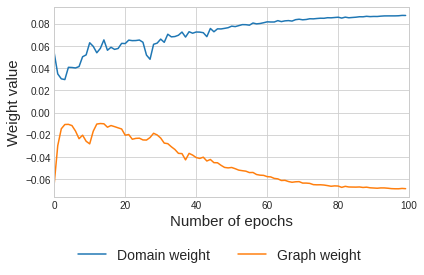

In [25]:

w1=open(model_path+'weights_1.txt').readlines()[0].split(',')
w2=open(model_path+'weights_2.txt').readlines()[0].split(',')

w11= [float(i) for i in w1[:-1]]
w22= [float(i) for i in w2[:-1]]

pu.plot_fig(w11,w22,100,0.1,fig_path)

## Plot training curves

In [26]:
seeds= [1,2,3,4,5,6,7,8,9,10]
loss_scores=['rmse','mae','scores']
#loss_scores= ['scores']
ylim=1
for seed in seeds:
    params=[seed, hidden_size, layers, epochs, learning_rate, lr_decay, lr_steps,batch_size]
    model_path='output/'+model_dir+model_name+ '-'.join(map(str,[gc,domain,Abs]))+'-set-'+'-'.join(map(str,params))+'/'
    for loss_score in loss_scores:
        fig_path= model_path+'figs/'
        if not os.path.exists(fig_path):
            os.mkdir(fig_path)    

        #print(model_path)
        train_scores_fn=open(model_path+'train_'+loss_score+'.txt').readlines()
        a = train_scores_fn[0].split(',')[:-1]
        
        train_scores=[float(a[i]) for i in range(1,len(a)) ]

        test_scores_fn=open(model_path+'test_'+loss_score+'.txt').readlines()
        b= test_scores_fn[0].split(',')[:-1]
        test_scores= [float(b[i]) for i in range(1,len(b))]
        print(len(test_scores),len(train_scores))
        
        if loss_score=='scores':
            best_scores[model_name+domain][loss_score][seed]=max(test_scores)
        else:
            best_scores[model_name+domain][loss_score][seed]=min(test_scores)
            
        print(f"Set {seed} Best {loss_score}: {best_scores[model_name+domain][loss_score][seed]}")
        #pu.plot_fig_2(train_scores,test_scores,ylim,loss_score,fig_path+loss_score+'_')



99 99
Set 1 Best rmse: 4.182525157928467
99 99
Set 1 Best mae: 0.5699489116668701
99 99
Set 1 Best scores: -214.42075942948804
99 99
Set 2 Best rmse: 0.29832717776298523
99 99
Set 2 Best mae: 0.24930724501609802
99 99
Set 2 Best scores: -0.021099337725850154
99 99
Set 3 Best rmse: 0.28379055857658386
99 99
Set 3 Best mae: 0.2323811650276184
99 99
Set 3 Best scores: 0.06845831357312893
99 99
Set 4 Best rmse: 0.2975071966648102
99 99
Set 4 Best mae: 0.24918831884860992
99 99
Set 4 Best scores: -0.061120692529932796
99 99
Set 5 Best rmse: 0.2873826324939728
99 99
Set 5 Best mae: 0.23966489732265472
99 99
Set 5 Best scores: 0.04112299121801655
99 99
Set 6 Best rmse: 0.288665771484375
99 99
Set 6 Best mae: 0.2351119965314865
99 99
Set 6 Best scores: 0.05218356540930902
99 99
Set 7 Best rmse: 0.29498204588890076
99 99
Set 7 Best mae: 0.24760115146636963
99 99
Set 7 Best scores: 0.04655515771325569
99 99
Set 8 Best rmse: 0.7188359498977661
99 99
Set 8 Best mae: 0.2854798436164856
99 99
Set 8 

In [22]:
def print_scores(best_scores,model_name,score_type):
    Mean, Std = np.mean(list(best_scores[model_name][score_type].values())), np.std(list(best_scores[model_name][score_type].values()))
    print(f"{round(Mean,3)}+{round(Std,3)}")




In [ ]:
for loss_score in loss_scores:
    print(loss_score)
    print_scores(best_scores,'az_model_5.3.0-lw-no_domain',loss_score ) 

In [11]:
for loss_score in loss_scores:
    print(loss_score)
    print_scores(best_scores,'az_model_5.3.0-lw-no_domain',loss_score ) 

rmse
0.275+0.01
mae
0.225+0.014
scores
0.118+0.05


In [23]:
for loss_score in loss_scores:
    print(loss_score)
    print_scores(best_scores,'az_model_5.3.1-lw-no_rdkit',loss_score ) 

rmse
0.295+0.015
mae
0.244+0.01
scores
-0.023+0.099


In [27]:
for loss_score in loss_scores:
    print(loss_score)
    print_scores(best_scores,'az_model_5.3.1-lw-rdkit',loss_score ) 

rmse
3391653255578.265+7188664057936.767
mae
310470469222.631+648210599688.019
scores
-7.37372979301188e+26+1.728168764110206e+27


In [30]:
7.37372979301188e+26/100000000000000000000

7373729.7930118805

In [13]:
for loss_score in loss_scores:
    print(loss_score)
    print_scores(best_scores,'su_model_5.3.1-lw-no_domain',loss_score ) #rdkit

rmse
0.122+0.009
mae
0.086+0.008
scores
0.82+0.028


In [19]:
for loss_score in loss_scores:
    print(loss_score)
    print_scores(best_scores,'su_model_5.3.1-lw-no_rdkit',loss_score ) #rdkit

rmse
0.114+0.004
mae
0.079+0.003
scores
0.842+0.013


In [26]:
for loss_score in loss_scores:
    print(loss_score)
    print_scores(best_scores,'su_model_5.3.1-lw-rdkit',loss_score ) #rdkit

rmse
0.116+0.005
mae
0.08+0.004
scores
0.836+0.013


In [30]:
for loss_score in loss_scores:
    print(loss_score)
    print_scores(best_scores,'dy_model_5.3.1-lw-rdkit',loss_score ) 

rmse
0.057+0.002
mae
0.04+0.001
scores
0.956+0.003


In [22]:
for loss_score in loss_scores:
    print(loss_score)
    print_scores(best_scores,'dy_model_5.3.1-lw-no_rdkit',loss_score ) 

rmse
0.085+0.014
mae
0.061+0.01
scores
0.9+0.031


In [14]:
for loss_score in loss_scores:
    print(loss_score)
    print_scores(best_scores,'dy_model_5.3.1-lw-no_domain',loss_score ) 

rmse
0.066+0.013
mae
0.047+0.008
scores
0.939+0.025


In [39]:
print_scores(best_scores,'az_model_5.3.1-lw-') #rdkit

-7.37372979301188e+26+1.728168764110206e+27


In [49]:
print_scores(best_scores,'su_model_5.3.1-lw-') #rdkit

0.836+0.013


In [68]:
print_scores(best_scores,'dy_model_5.3.1-learn-w-') #rdkit

0.958+0.003


In [64]:
print_scores(best_scores,'dy_model_5.3.1-learn-w-') #no_domain

0.846+0.28


In [60]:
print_scores(best_scores,'dy_model_5.3.1-learn-w-') #no_rdkit

0.855+0.062


In [78]:
print_scores(best_scores,'su_model_5.3.0-learn-w-') #rdkit

0.839+0.012


In [73]:
print_scores(best_scores,'su_model_5.3.0-lw-') #no_domain

0.803+0.063


In [66]:
print_scores(best_scores,'su_model_5.3.0-lw-') #no_rdkit

0.833+0.019


In [45]:
print_scores(best_scores,'az_model_5.3.1-learn-w-') #no_domain

0.157+0.044


In [30]:
print_scores(best_scores,'az_model_5.3.1-learn-w-') #rdkit

-6.244519745660744e+26+1.6523794752488728e+27


In [51]:
print_scores(best_scores,'az_model_5.3.1-learn-w-') #no_domain

0.143+0.052


In [48]:
print_scores(best_scores,'az_model_5.3.1-learn-w-') #no_rdkit

0.005+0.078


In [18]:
print_scores(best_scores,'az_model_5.3.0-lw-') #rdkit

-5.227496394300317e+26+1.2804698798274674e+27


In [21]:
np.std(list(best_scores[model_name][0.5].values()))

1.2804698798274674e+27

In [24]:
print(1.2e+27)

1.2e+27


## Plot actual vs Pred

In [7]:
def plot_actual_vs_predicted(model_results,model_path,key,alpha):
    y_true = model_results['yield'].values
    y_pred = model_results['pred_yield'].values

    plt.style.use('seaborn-whitegrid')
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(y_true, y_pred, color='b',alpha=alpha)
    ax.set_xlabel('Actual yields-'+key,fontsize=15)
    ax.set_ylabel('Predicted yields-'+key,fontsize=15)
    
    ax.set_xlim([0,1]); ax.set_ylim([0,1])
    plt.tight_layout()

    plt.savefig(model_path+'figs/'+key+'_actual_vs_predicted.png',dpi=300)
    plt.show()

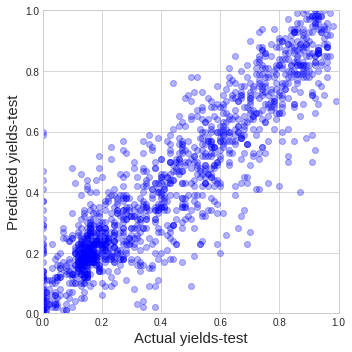

In [13]:
#model_path = 'output/model_5.3.1-learn-w/az_model_5.3.1-learn-w-gc-no_domain-abs-set-3-100-1-100-0.01-0.5-10000-40/'
#model_path = 'output/model_5.3.1-learn-w/dy_model_5.3.1-learn-w-gc-rdkit-abs-set-4-200-2-200-0.01-0.5-10000-40/'
model_path = 'output/model_5.3.1-learn-w/su_model_5.3.1-learn-w-gc-rdkit-abs-set-9-200-2-200-0.01-0.5-10000-40/'
key= 'test'
model_results_fn= os.path.join(model_path,'model_res','model_preds_'+key+'.csv')
model_results = pd.read_csv(model_results_fn)

plot_actual_vs_predicted(model_results,model_path,key,0.3)

(1, 66, 15, 200)


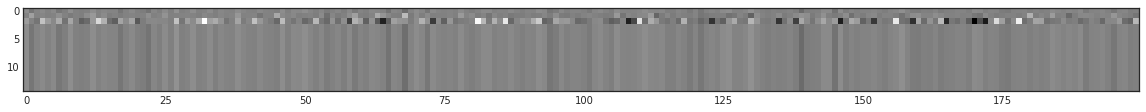

In [37]:

with plt.style.context("seaborn-white"):
    plt.figure(figsize=(20, 10), frameon=False)
    image=np.load('data/image_1.npy')
    print(image.shape)
    try:
        plt.imshow(image[0])
    except:
        plt.imshow(image[0,1,:,:])
        #for j in range(image.shape[2]):
            #plt.imshow(image[0,:,j])
            #plt.show()

(1, 66, 15, 200)
(1, 66, 15, 200)
(1, 66, 15, 200)
(1, 66, 15, 200)
(1, 66, 66, 200)
(1, 15, 15, 200)


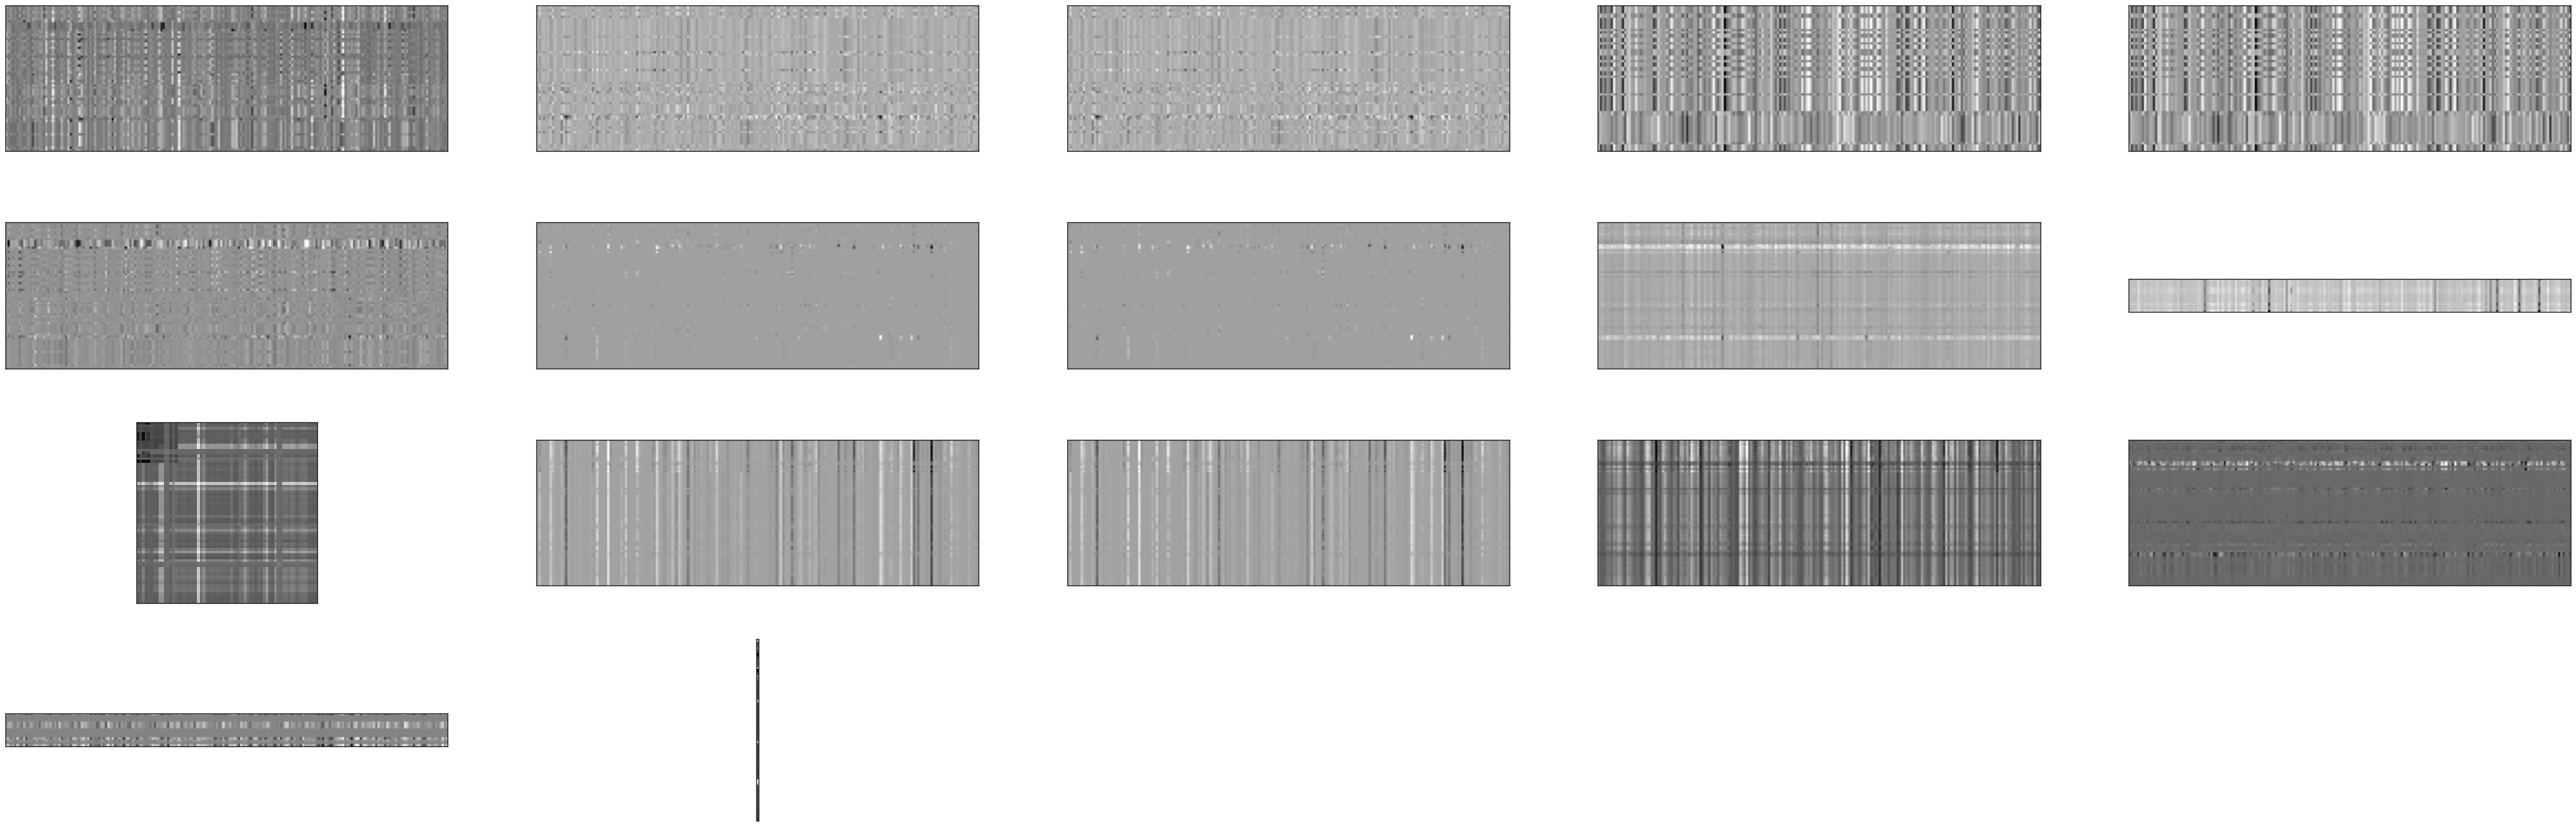

In [39]:

with plt.style.context("seaborn-white"):
    plt.figure(figsize=(60, 20), frameon=False)
    for idx in range(17):
        image=np.load('data/image_'+str(idx)+'.npy')
        print(image.shape)plt.subplot(4, 5, idx+1)
        try:
            plt.imshow(image[0])
        except:
            
            plt.imshow(image[0,:,1,:])   
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

(1, 65, 15, 200)
(1, 65, 15, 200)
(1, 65, 15, 200)
(1, 65, 15, 200)
(1, 65, 65, 200)
(1, 15, 15, 200)


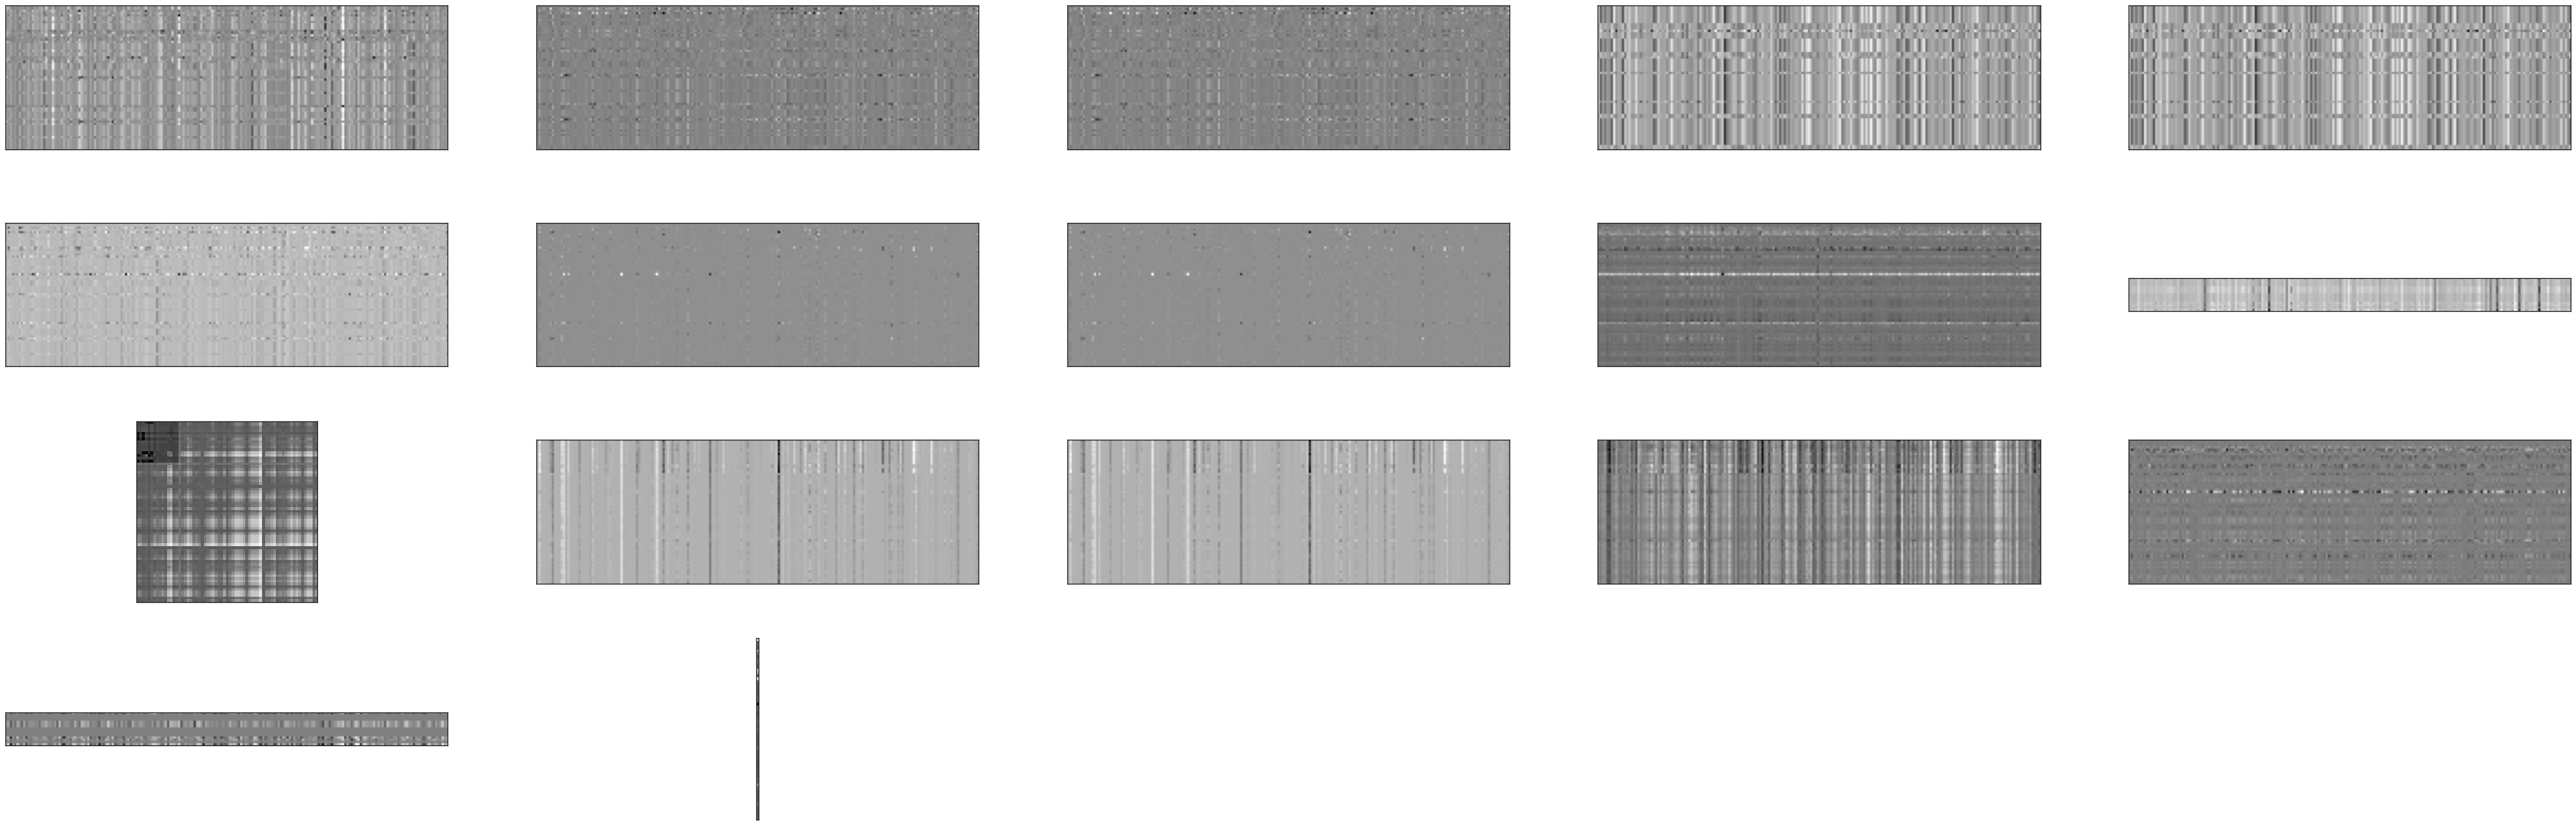

In [41]:

with plt.style.context("seaborn-white"):
    plt.figure(figsize=(60, 20), frameon=False)
    for idx in range(17):
        image=np.load('data/image_'+str(idx)+'.npy')
        plt.subplot(4, 5, idx+1)
        try:
            plt.imshow(image[0])
        except:
            print(image.shape)
            plt.imshow(image[0,:,1,:])   
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

ValueError: num must be 1 <= num <= 20, not 21

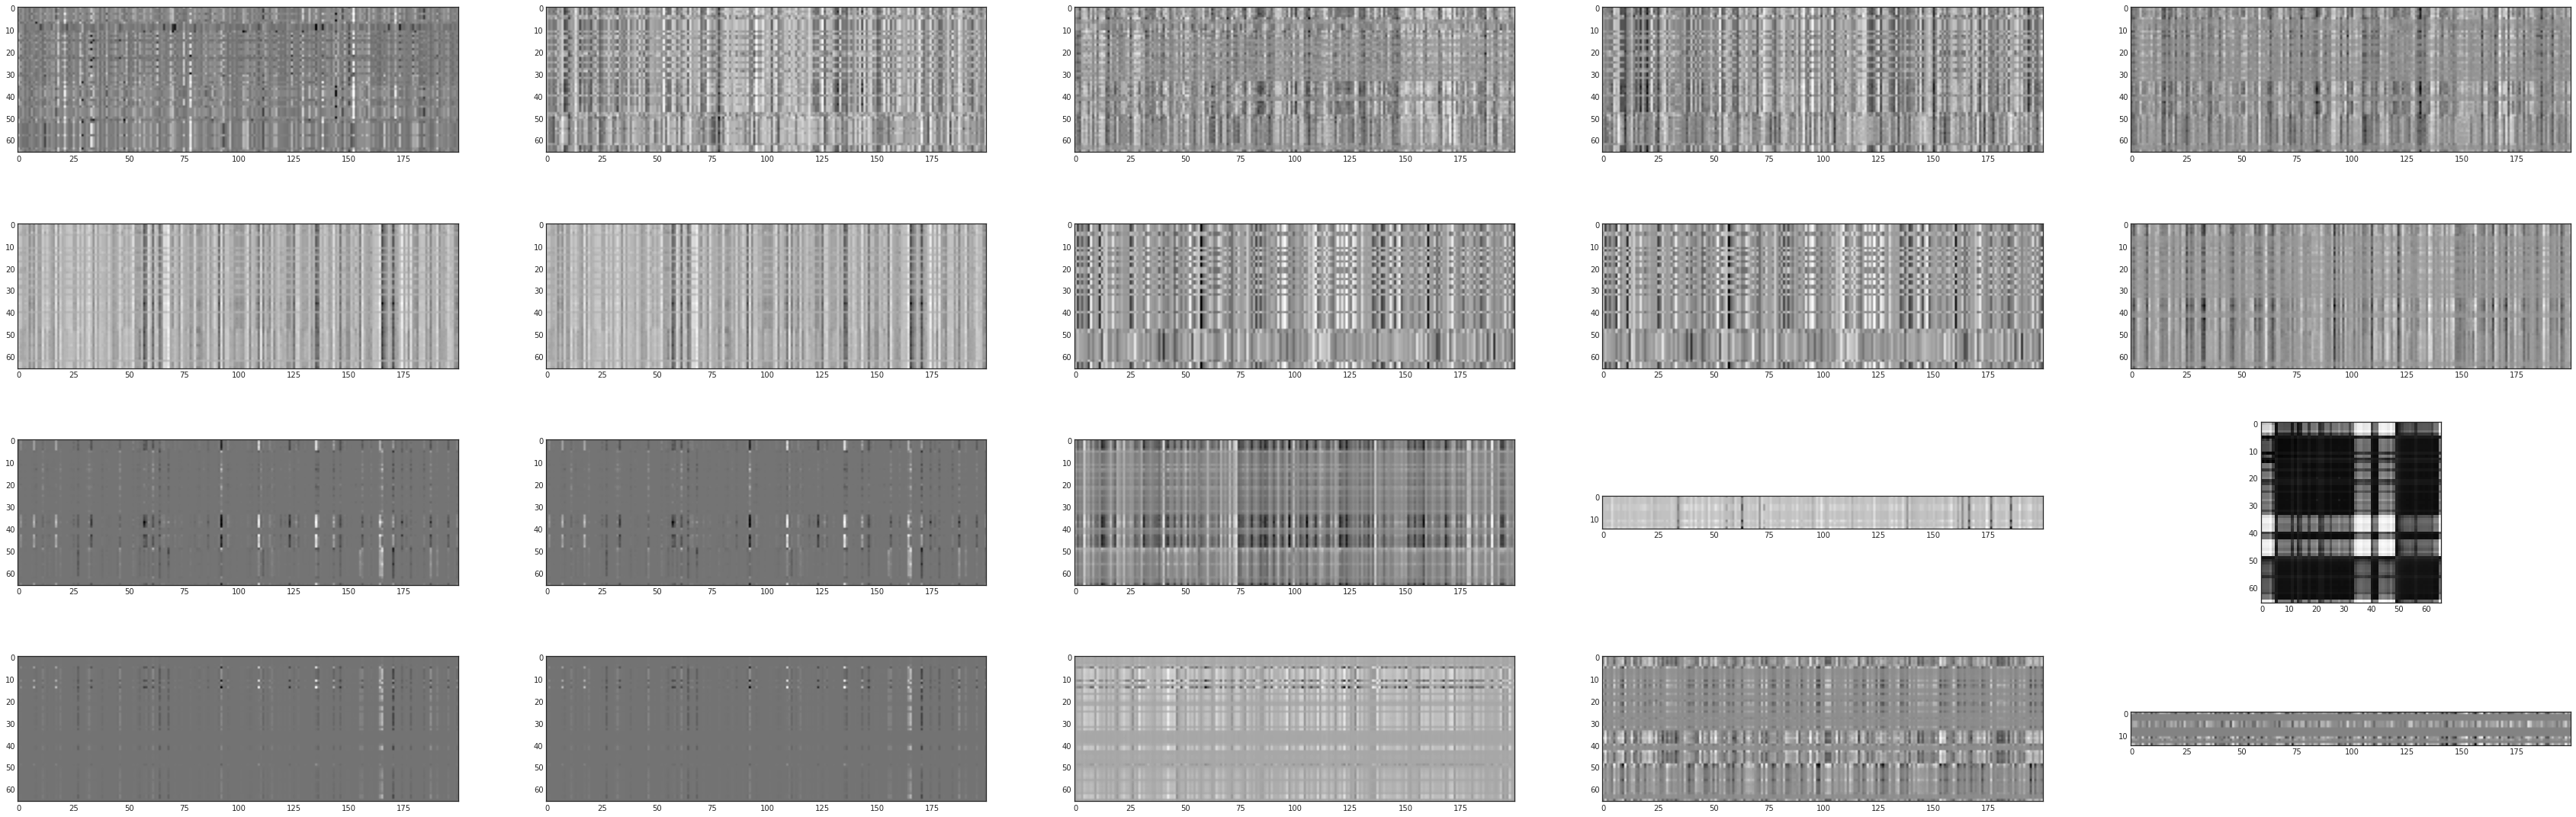

In [52]:

with plt.style.context("seaborn-white"):
    plt.figure(figsize=(60, 20), frameon=False)
    for idx in range(21):
        image=np.load('data/image_'+str(idx)+'.npy')
        plt.subplot(4, 5, idx+1)
        try:
            plt.imshow(image[0])
        except:
            plt.imshow(image[0,:,1])    
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

In [20]:
model_name='az_model_5.3.1-learn-w-' #no_domain, tune lr with test h-size:100, layers:3; lr=0.003
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.14305205005862737
0.14087031934671584
0.04463480537683659


In [10]:
model_name='az_model_5.3.1-learn-w-' #no_domain, tune lr with test h-size:100, layers:3
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.15729139188840474
0.16767789408446993
0.04356696008168487


In [6]:
model_name='az_model_5.3.1-learn-w-' #no_domain, tune lr with test h-size:30, layers:3
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.12192492427390782
0.125706283804206
0.046964432033635393


In [140]:
model_name='az_model_5.3.0-learn-w-' #no_domain, tune lr with train h-size:100, layers:1
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.09598966466608841
0.09098841515445533
0.045887284111654804


In [128]:
model_name='az_model_5.3.1-learn-w-' #no_domain
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.14253755987751618
0.15615903991500707
0.05173411677824965


In [23]:
model_name='az_model_5.3.1-learn-w-' #rdkit
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

-5.9197157215385114e+26
0.0026712474773462613
1.7667958155620094e+27


In [120]:
model_name='az_model_5.3.1-learn-w-' #no_rdkit
    #print(np.median(list(best_scores[model_name][0.5].values())))
    #print()

0.005164253083650372
0.01246932673885931
0.07772848449115179


In [38]:
model_name='su_model_5.3.1-learn-w-'#no_domain
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.8269239094655763
0.8348134340016597
0.018010713786442163


In [89]:
model_name='su_model_5.3.1-learn-w-'#rdkit
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.8291387028187346
0.8297328608062493
0.010538528033680293


In [100]:
model_name='su_model_5.3.1-learn-w-'; #no_rdkit
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.8375164095638181
0.8362693943394905
0.010457875493287892


In [29]:
model_name='su_model_5.3.0-learn-w-' #rdkit, schedule on test
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.8394028078401543
0.8374939860895318
0.012426043301051


In [50]:
model_name='su_model_5.3.0-learn-w-' #rdkit, schedule on test
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.8394028078401543
0.8374939860895318
0.012426043301051


In [85]:
model_name='dy_model_5.3.0-learn-w-'#rdkit, schedule on test
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.9492524592043395
0.9537827133585571
0.008825908545137878


In [41]:
model_name='dy_model_5.3.1-learn-w-' #no_domain
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.8566753681762884
0.94651079495247
0.2672126989802607


In [112]:
model_name='dy_model_5.3.1-learn-w-' #no_rdkit
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.8397256411560869
0.842460460239421
0.07338899148540994


In [82]:
model_name='dy_model_5.3.1-learn-w-' #rdkit
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.9580802960715271
0.9566228074665839
0.0032284048078603284


In [116]:
model_name='su_model_5.2.0-no-abs-gc-rdkit'
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.9423159106596618
0.9644249650361716
0.05956678252947914


In [113]:
model_name='dy_model_4.6.3-noabs-learnable-no_rdkit'
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.9553422107783808
0.9697857415145136
0.03641500952709893


In [99]:
model_name= 'az_model_1.0.1-abs-gc-learnable-rdkit_w_domain'
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.9249828494448065
0.9222148820830246
0.009544946918076015


In [92]:
model_name='az_model_1.0.0-abs-gc-no-slv-base-no_domain'
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.8161332350824797
0.8206247666573041
0.011617898657093506


In [89]:
model_name='az_model_1.0.0-abs-gc-no_domain'
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.8562527259188547
0.8627803407668244
0.014402217764144822


In [87]:
model_name='az_model_1.0.0-rdkit-abs-gc-no_domain'
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.8703889559127925
0.8705087055892469
0.008467439221117977


In [104]:
model_name='dy_model_4.6.3-noabs-w_domain'
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.9458139835201371
0.9670924247048882
0.046793274792578145


In [78]:
model_name='dy_model_4.6.3-rdkit-noabs-no_domain'
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.900102981960428
0.9139953013608585
0.04148124124331706


In [71]:
model_name='su_model_5.2.0-rdkt-no-abs-gc-w_domain'
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

0.9619963103801416
0.9629298763891408
0.019551162242086903


In [65]:
model_name='su_model_5.2.0-rdkt-no-abs-w_domain'
print(np.mean(list(best_scores[model_name][0.5].values())))
print(np.median(list(best_scores[model_name][0.5].values())))
print(np.std(list(best_scores[model_name][0.5].values())))

nan
nan
nan


/afs/crc.nd.edu/user/m/msaebi/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/afs/crc.nd.edu/user/m/msaebi/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/afs/crc.nd.edu/user/m/msaebi/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/afs/crc.nd.edu/user/m/msaebi/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/afs/crc.nd.edu/user/m/msaebi/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [19]:
model_name='su_model_5.2.1-rdkt-w_domain'
print(100*np.mean(list(best_scores[model_name][0.5].values())))
print(100*np.median(list(best_scores[model_name][0.5].values())))
print(100*np.std(list(best_scores[model_name][0.5].values())))

0.7930717925530603
0.8031536521671425
0.09273502787938755


In [17]:
model_name='su_model_5.2.0-rdkt-w_domain'
print(100*np.mean(list(best_scores[model_name][0.5].values())))
print(100*np.median(list(best_scores[model_name][0.5].values())))
print(100*np.std(list(best_scores[model_name][0.5].values())))

0.796652536266677
0.959825637843052
0.22965417620211737


In [11]:
model_name='su_model_5.2.0-rdkt-no_domain'
print(100*np.mean(list(best_scores[model_name][0.5].values())))
print(100*np.median(list(best_scores[model_name][0.5].values())))
print(100*np.std(list(best_scores[model_name][0.5].values())))

0.875966793566865
0.8989941840835782
0.06727745920380666
